In [2]:
import pandas as pd

In [3]:
#importing dataset
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/My Drive/Motor_Vehicle_Collisions_-_Crashes2.xlsx')

In [5]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107296,2022-04-23,09:00:00,MANHATTAN,10014.0,0.000000,0.000000,"(0.0, 0.0)",7 AVENUE SOUTH,PERRY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4521431,Sedan,Sedan,NaN,NaN,NaN
107297,2022-04-20,11:30:00,QUEENS,11434.0,40.684048,-73.777750,"(40.684048, -73.77775)",118 AVENUE,168 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4521951,Sedan,Sedan,NaN,NaN,NaN
107298,2022-04-21,09:24:00,QUEENS,11101.0,40.738870,-73.932846,"(40.73887, -73.932846)",HUNTERS POINT AVENUE,33 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4521970,Tractor Truck Diesel,Pick-up Truck,NaN,NaN,NaN
107299,2022-04-23,08:35:00,NaN,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY,EAST FORDHAM ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4521797,Pick-up Truck,Sedan,NaN,NaN,NaN


In [8]:
import matplotlib.pyplot as plt

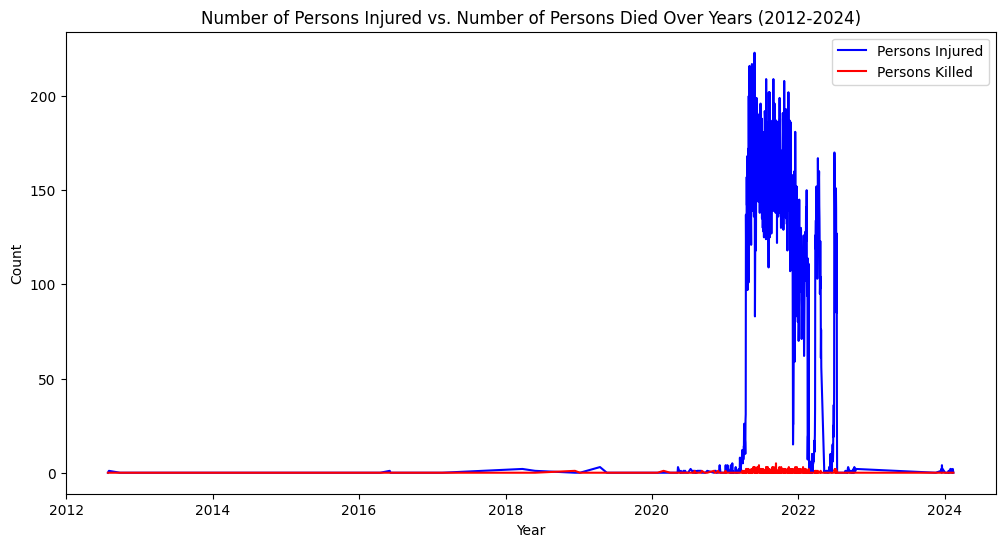

In [9]:
# Extract date part from 'CRASH DATE'
df['DATE'] = df['CRASH DATE'].dt.date

# Data Aggregation
crash_count_per_date = df.groupby('DATE')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(crash_count_per_date.index, crash_count_per_date['NUMBER OF PERSONS INJURED'], label='Persons Injured', color='blue')
plt.plot(crash_count_per_date.index, crash_count_per_date['NUMBER OF PERSONS KILLED'], label='Persons Killed', color='red')
plt.title('Number of Persons Injured vs. Number of Persons Died Over Years (2012-2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
# plt.grid(True)
plt.show()

<ipython-input-10-58e6f5519c39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = df_filtered['CRASH DATE'].dt.date


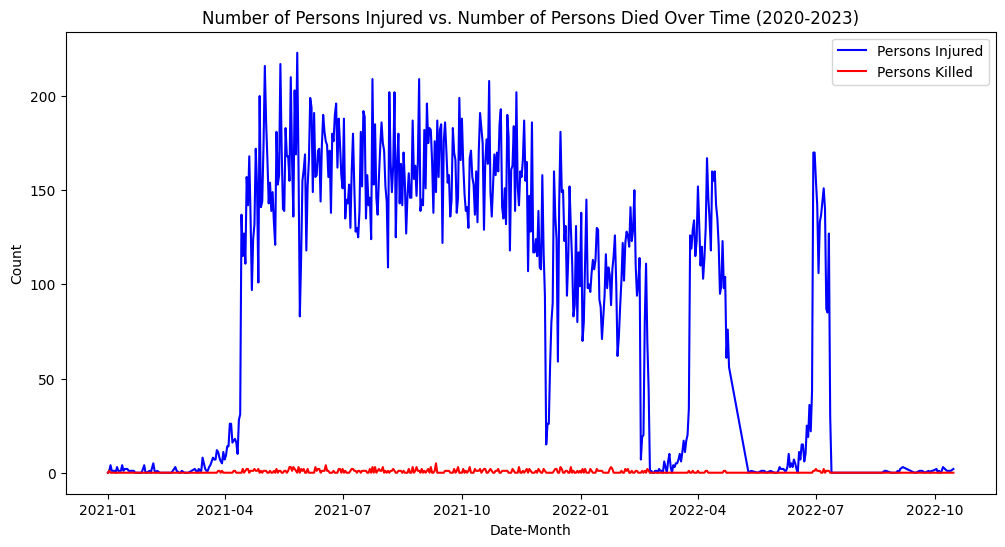

In [10]:
# Filter data for the years 2020 to 2023
mask = (df['CRASH DATE'].dt.year >= 2021) & (df['CRASH DATE'].dt.year <= 2022)
df_filtered = df[mask]

# Extract date part from 'CRASH DATE'
df_filtered['DATE'] = df_filtered['CRASH DATE'].dt.date

# Data Aggregation
crash_count_per_date = df_filtered.groupby('DATE')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(crash_count_per_date.index, crash_count_per_date['NUMBER OF PERSONS INJURED'], label='Persons Injured', color='blue')
plt.plot(crash_count_per_date.index, crash_count_per_date['NUMBER OF PERSONS KILLED'], label='Persons Killed', color='red')
plt.title('Number of Persons Injured vs. Number of Persons Died Over Time (2020-2023)')
plt.xlabel('Date-Month')
plt.ylabel('Count')
plt.legend()
# plt.grid(True)
plt.show()

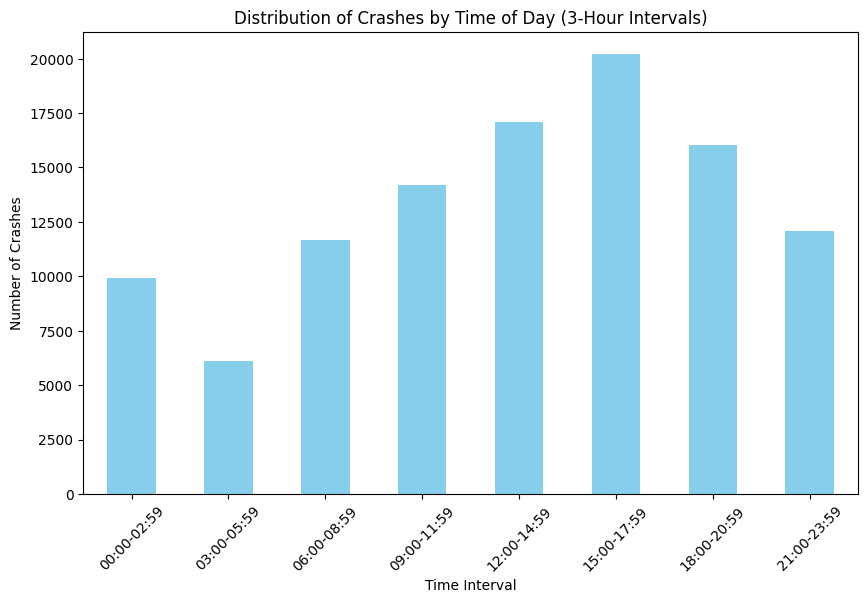

In [14]:
# Extract hour component from 'CRASH TIME'
df['CRASH HOUR'] = df['CRASH TIME'].apply(lambda x: x.hour)

# Define custom interval labels
interval_labels = ['00:00-02:59', '03:00-05:59', '06:00-08:59', '09:00-11:59', '12:00-14:59', '15:00-17:59', '18:00-20:59', '21:00-23:59']

# Group data into 3-hour intervals and assign custom labels
df['CRASH TIME INTERVAL'] = pd.cut(df['CRASH HOUR'], bins=range(0, 25, 3), right=False, labels=interval_labels)

# Count the number of crashes for each 3-hour interval
crash_count_by_interval = df['CRASH TIME INTERVAL'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
crash_count_by_interval.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crashes by Time of Day (3-Hour Intervals)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
# plt.grid(axis='y')
plt.show()